In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality.csv')


In [33]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
#Checking if anything is null 
missing_values = df.isnull().sum()
print(missing_values)
#it is not, so we dont need to fill missing lines with median

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [36]:
print(df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


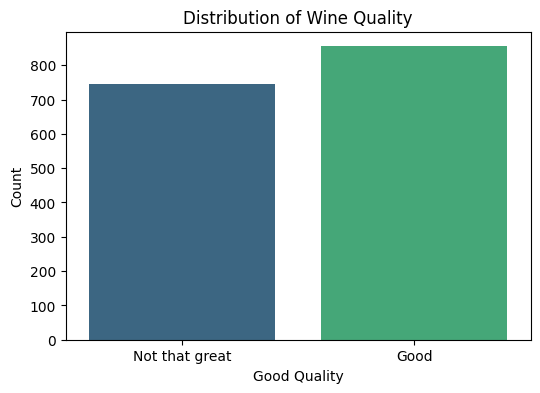

Number of wines with good quality (rating >= 6): 855
Number of wines with not good quality (rating < 6): 744


In [37]:
# distribution of wines based on quality
# assuming rating 6 is a breaking point <6 bad, >=6 good
quality_threshold = 6

df['good_quality'] = df['quality'] >= quality_threshold


plt.figure(figsize=(6, 4))


sns.countplot(x='good_quality', data=df, hue='good_quality', palette='viridis', legend=False)
plt.title('Distribution of Wine Quality')
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not that great', 'Good'])

plt.show()

print("Number of wines with good quality (rating >= {}):".format(quality_threshold), df['good_quality'].sum())
print("Number of wines with not good quality (rating < {}):".format(quality_threshold), (~df['good_quality']).sum())

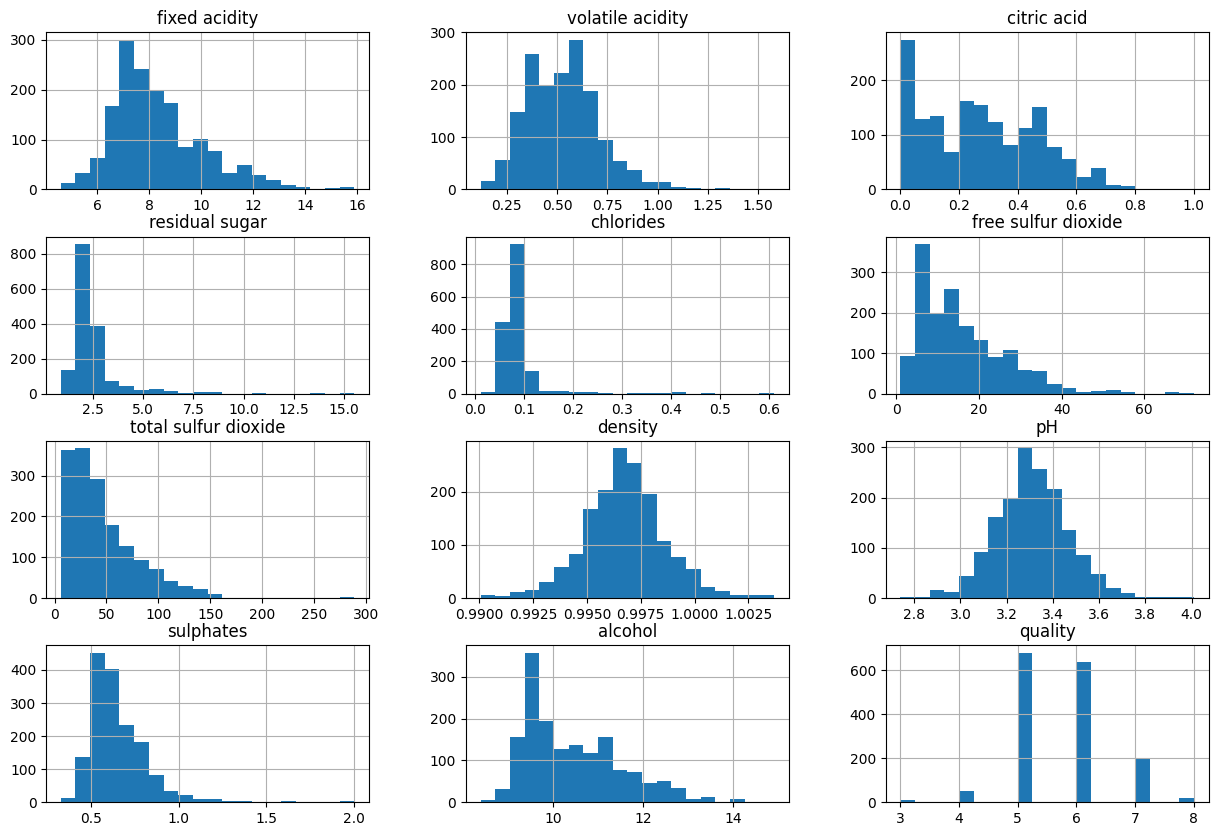

In [38]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15, 10))
plt.show()

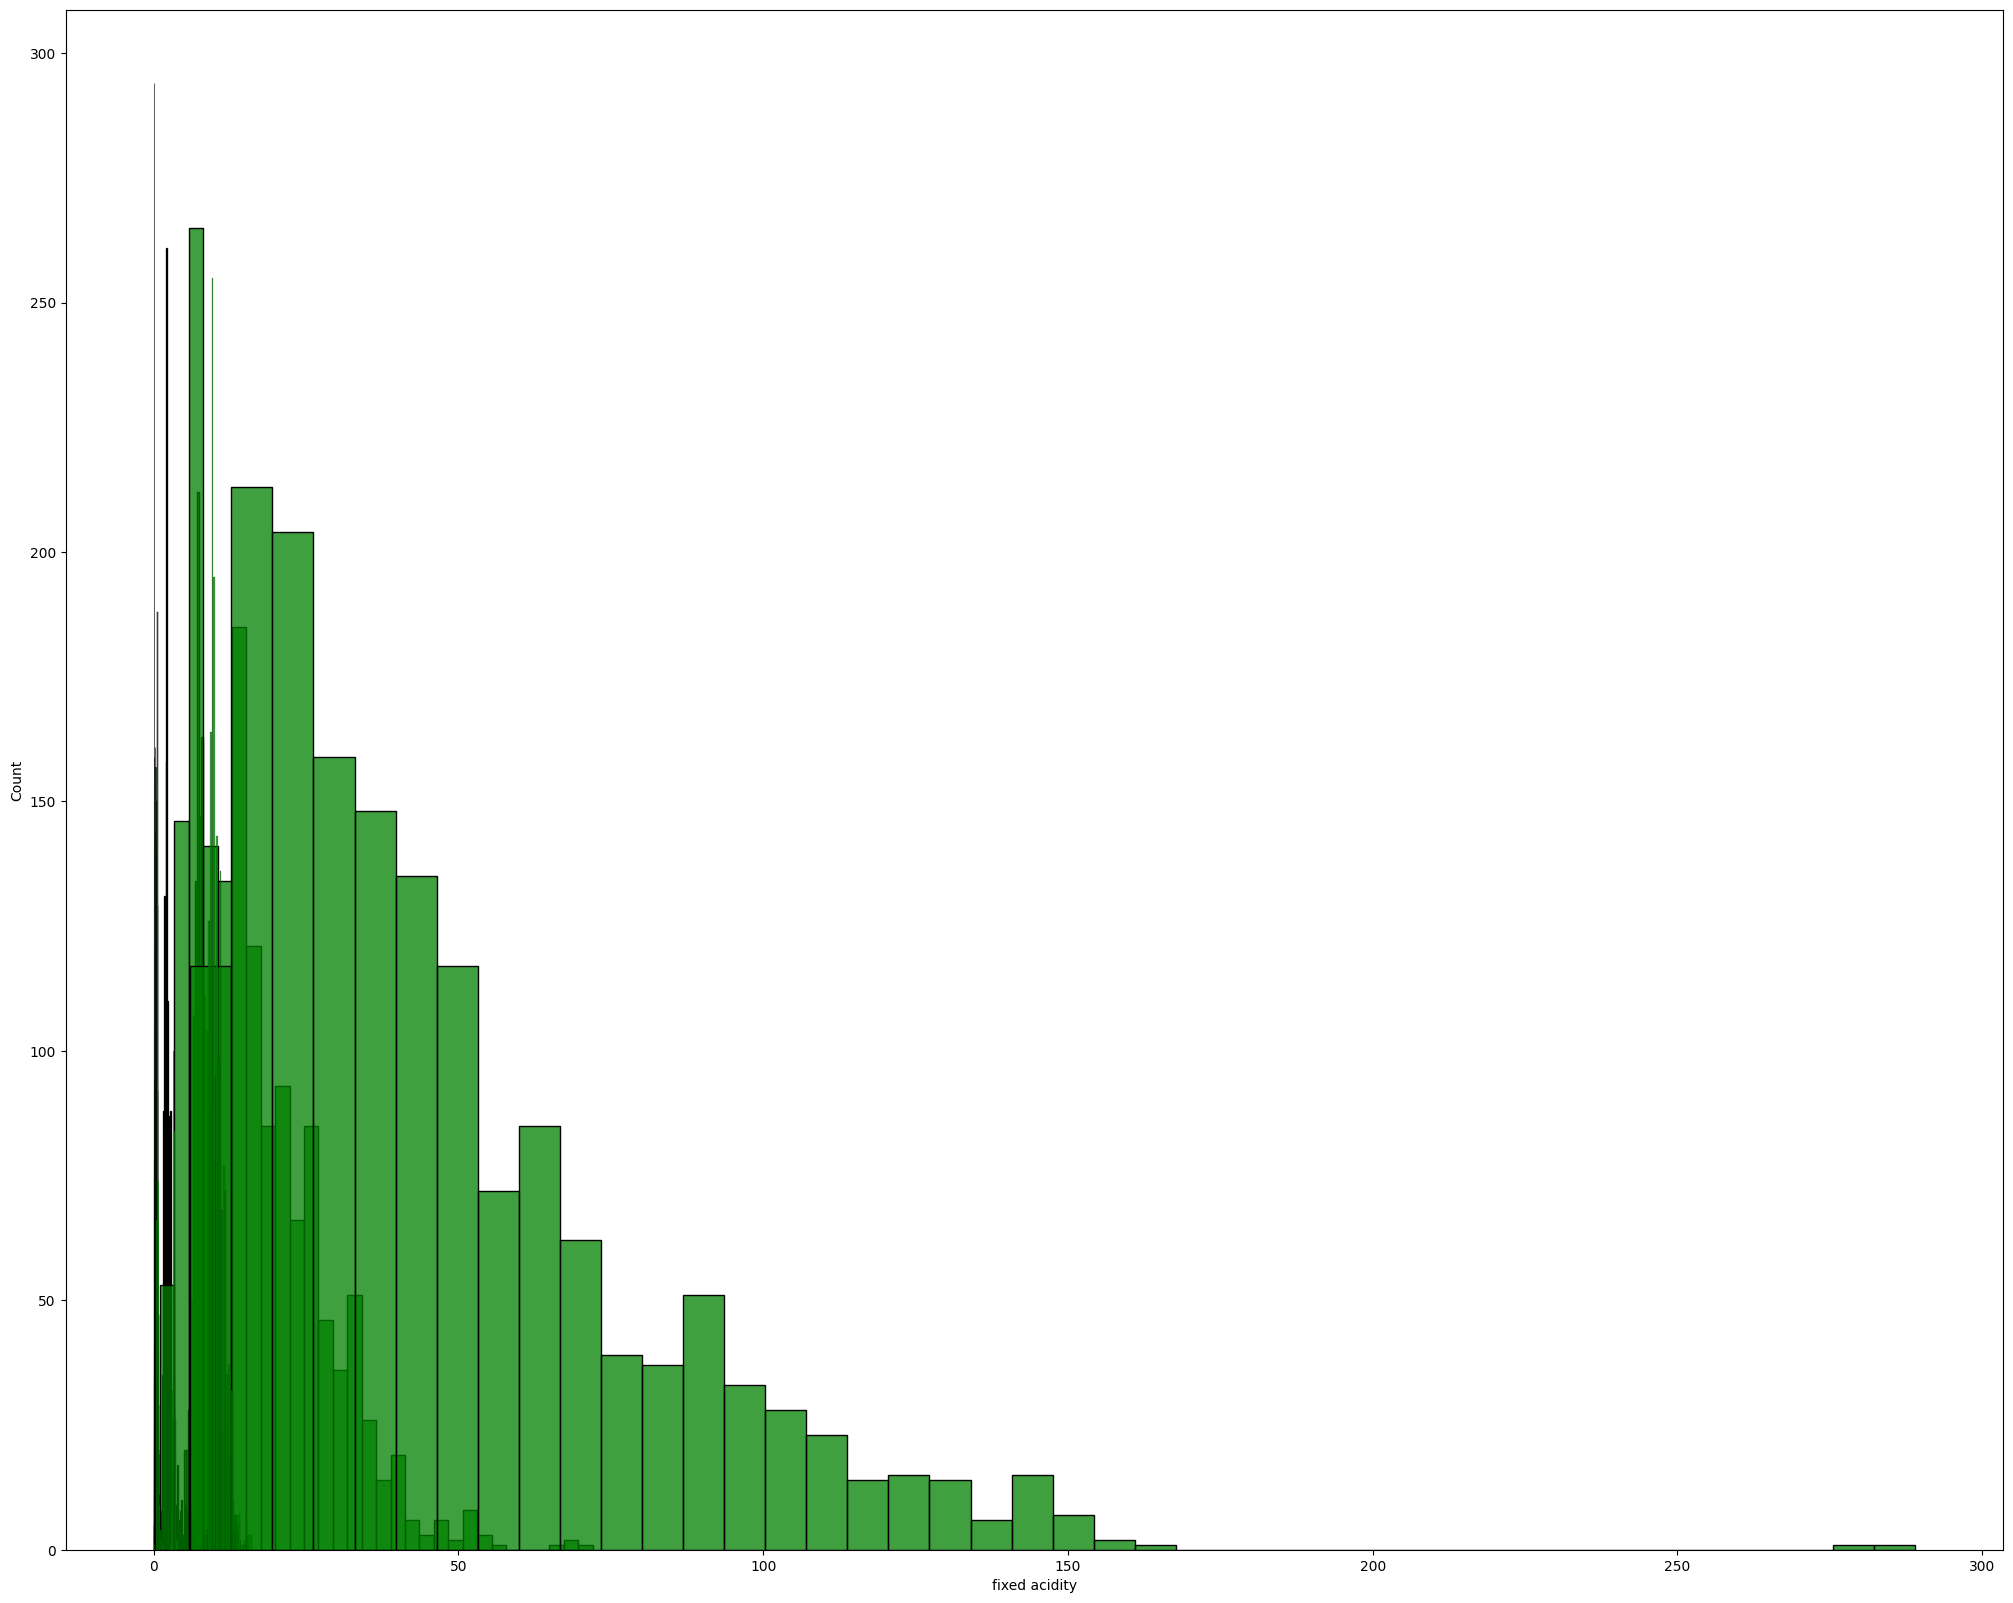

In [39]:
#Histogram plot distribution
no_target = ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol']
plt.figure(figsize=(25,20))

for i in range(0, len(no_target)):
  ax = sns.histplot(x=df[no_target[i]], color='green')

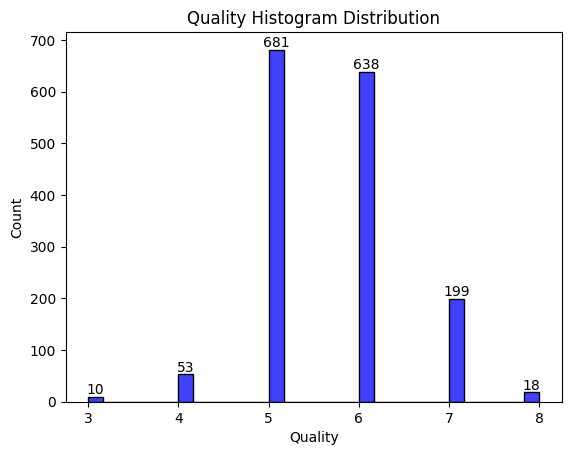

In [40]:
#detaljniji prikaz distribucije kvaliteta

ax = sns.histplot(x=df['quality'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('Quality')
plt.title('Quality Histogram Distribution')
plt.show()

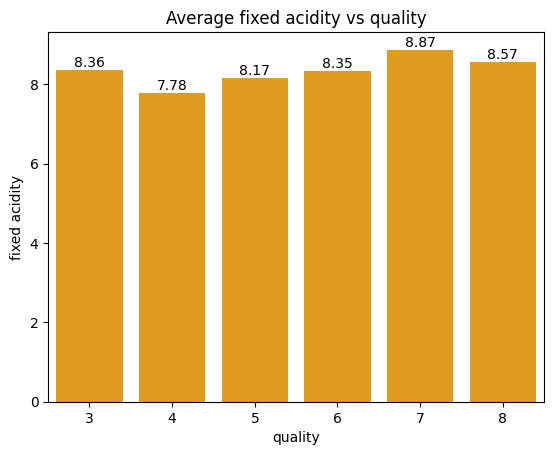

In [41]:
#Average fixed acidity vs quality

ax = sns.barplot(x=df['quality'], y=df['fixed acidity'], estimator='mean', color='orange', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average fixed acidity vs quality')
plt.show()





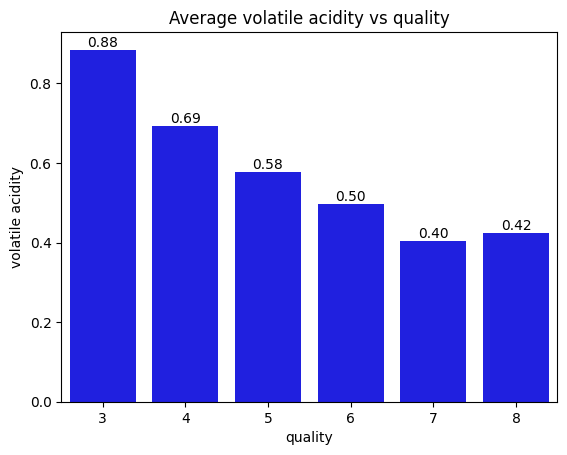

In [42]:
#Average volatile acidity vs quality

ax = sns.barplot(x=df['quality'], y=df['volatile acidity'], estimator='mean', color='blue', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average volatile acidity vs quality')
plt.show()

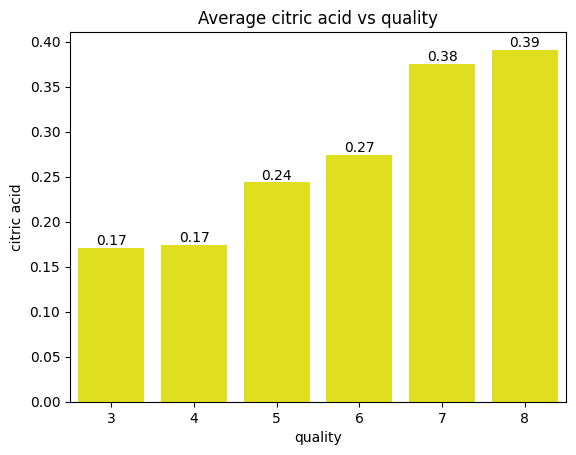

In [43]:
#Average citric acid vs quality

ax = sns.barplot(x=df['quality'], y=df['citric acid'], estimator='mean', color='yellow', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average citric acid vs quality')
plt.show()

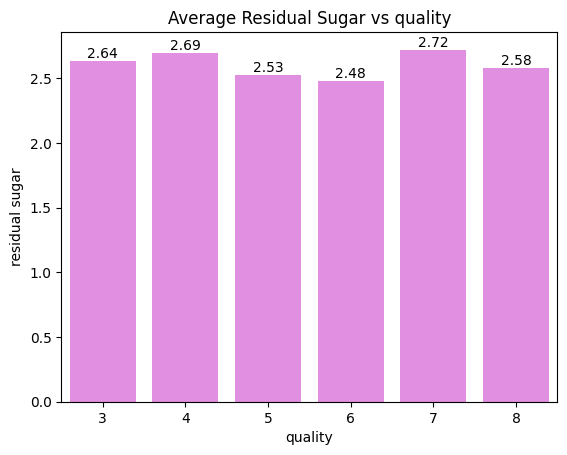

In [44]:
#Average Residual Sugar vs quality
ax = sns.barplot(x=df['quality'], y=df['residual sugar'], estimator='mean', color='violet', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Residual Sugar vs quality')
plt.show()

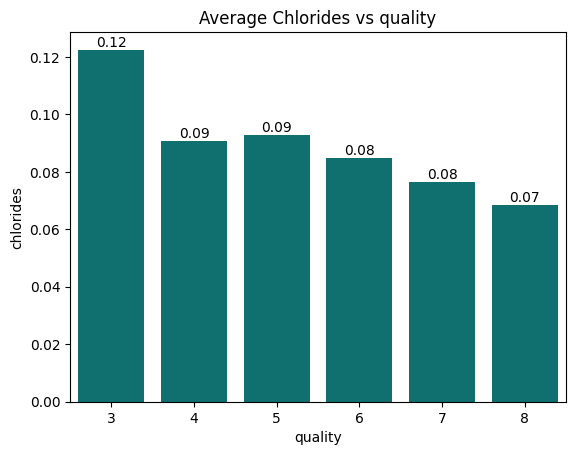

In [45]:
#Average Chlorides vs quality

ax = sns.barplot(x=df['quality'], y=df['chlorides'], estimator='mean', color='teal', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Chlorides vs quality')
plt.show()

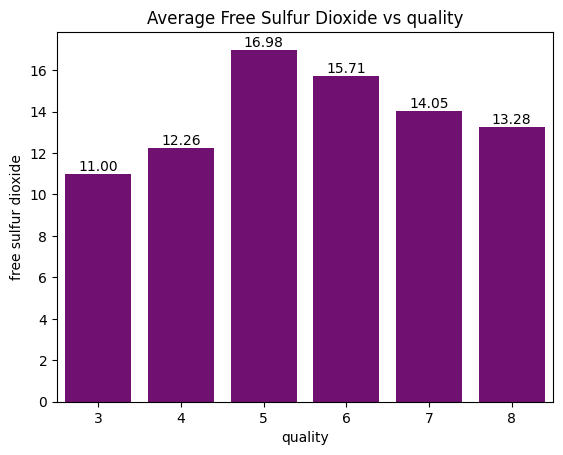

In [46]:
#Average Free Sulfur Dioxide vs quality

ax = sns.barplot(x=df['quality'], y=df['free sulfur dioxide'], estimator='mean', color='purple', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Free Sulfur Dioxide vs quality')
plt.show()

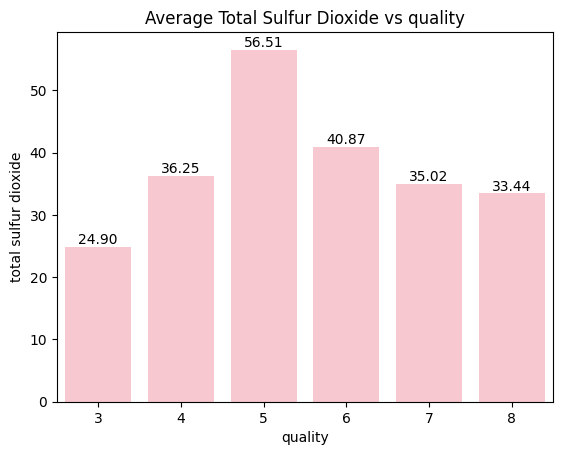

In [47]:
#Average Total Sulfur Dioxide vs quality

ax = sns.barplot(x=df['quality'], y=df['total sulfur dioxide'], estimator='mean', color='pink', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Total Sulfur Dioxide vs quality')
plt.show()

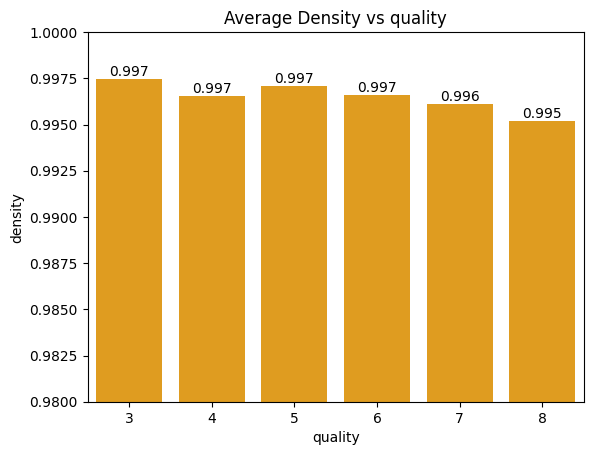

In [48]:
#Average Density vs quality

ax = sns.barplot(x=df['quality'], y=df['density'], estimator='mean', color='orange', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.ylim(0.98,1)
plt.title('Average Density vs quality')
plt.show()

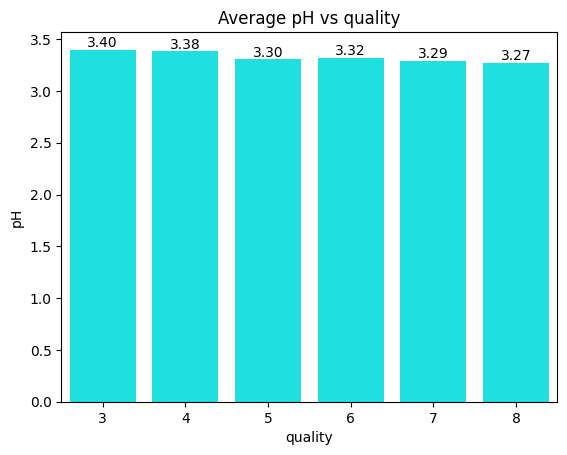

In [49]:
#Average pH vs quality

ax = sns.barplot(x=df['quality'], y=df['pH'], estimator='mean', color='#00ffff', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average pH vs quality')
plt.show()

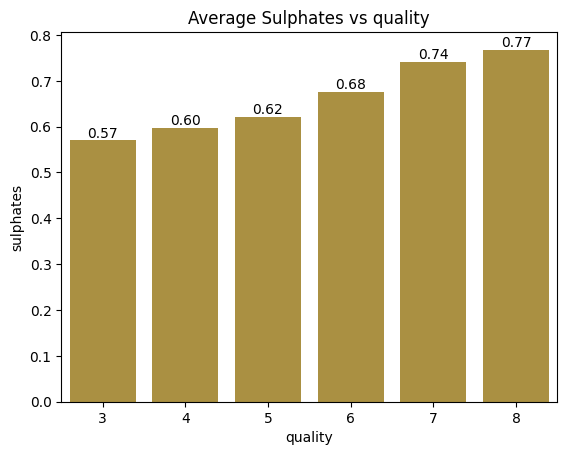

In [50]:
#Average Sulphates vs quality

ax = sns.barplot(x=df['quality'], y=df['sulphates'], estimator='mean', color='#BB9831', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Sulphates vs quality')
plt.show()

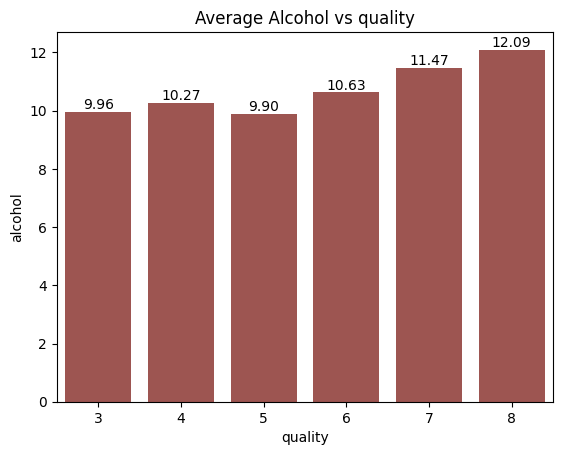

In [51]:
#Average Alcohol vs quality

ax = sns.barplot(x=df['quality'], y=df['alcohol'], estimator='mean', color='#AA4A44', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Alcohol vs quality')
plt.show()

In [52]:
#Optimization
#dataset shows 240 duplicates
print('Is there any duplicated value :', df.duplicated().any())
print('Total duplicated value :', df.duplicated().sum())
#Deleting duplicates
df[df.duplicated(keep=False) == True]
df_nodupe = df.drop_duplicates()
print('DELETING DUPLICATES..')
print('Is there any duplicated value :', df_nodupe.duplicated().any())
print('Total duplicated value :', df_nodupe.duplicated().sum())

Is there any duplicated value : True
Total duplicated value : 240
DELETING DUPLICATES..
Is there any duplicated value : False
Total duplicated value : 0


In [53]:
from sklearn.model_selection import train_test_split

X = df_nodupe.drop('quality', axis=1)
y = df_nodupe['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest OOB Score: {rf.oob_score_}")

Random Forest Mean Squared Error: 0.15087960294117644
Random Forest OOB Score: 0.7499236020680276


In [55]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialization and training
model = DecisionTreeRegressor(random_state=17)
model.fit(X_train, y_train)

# Test prediction
y_pred = model.predict(X_test)

# Evaluation model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Decision Tree Regressor Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.30514705882352944
R^2 Score: 0.5055953397718065


In [56]:
import xgboost as xgb

# Pretvaranje podataka u DMatrix format koji XGBoost očekuje
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Definisanje parametara modela
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.3
}

# Treniranje modela
model = xgb.train(params, dtrain, num_boost_round=100)

# Predikcija na test skupu
y_pred = model.predict(dtest)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.16349004948959903
R^2 Score: 0.7351105310330357
